In [82]:
import pandas as pd

df_sheet1 = pd.read_excel("Willingness_to_buy.xlsx")
df_sheet = df_sheet1.T
df_sheet2 = pd.read_excel("Pump_prices.xlsx", skiprows=5)
df_sheet3 = pd.read_excel("TIL6010 python.xlsx", sheet_name='Verkoopcijfers autos in nederla')

In [83]:
import re

def extract_valid_date(date_str):
    match = re.search(r'\d{4}\s\w+', date_str)
    if match:
        return match.group()
    return None


In [84]:
df_sheet2.rename(columns={"Motor fuel": "Periods"}, inplace=True)
df_sheet2 = df_sheet2[1:]
selected_columns_1 = ["Periods", "Euro 95", "Transport diesel", "LPG"]
df_sheet2 = df_sheet2[selected_columns_1]
df_sheet2['Periods'] = df_sheet2['Periods'].apply(extract_valid_date)
df_sheet2 = df_sheet2.dropna(subset=['Periods'])
df_sheet2['Periods'] = pd.to_datetime(df_sheet2['Periods'], format='%Y %B')
df_sheet2.reset_index(drop=True, inplace=True)
df_sheet2.head()

,Periods,Euro 95,Transport diesel,LPG
0,2006-01-01,1.357,1.018,0.558
1,2006-02-01,1.330,1.020,0.553
2,2006-03-01,1.356,1.045,0.522
3,2006-04-01,1.431,1.078,0.522
4,2006-05-01,1.433,1.073,0.500


In [85]:
df_sheet.columns = df_sheet.iloc[0]
df_sheet = df_sheet[2:]
df_sheet.rename(columns={"Topic": "Periods"}, inplace=True)

selected_columns = ["Periods", "Consumer confidence", "Economic climate", "Willingness to buy"]
df_sheet = df_sheet[selected_columns]

df_sheet['Periods'] = df_sheet['Periods'].apply(extract_valid_date)
df_sheet = df_sheet.dropna(subset=['Periods'])
df_sheet['Periods'] = pd.to_datetime(df_sheet['Periods'], format='%Y %B')
df_sheet.reset_index(drop=True, inplace=True)
df_sheet.tail()

Column1,Periods,Consumer confidence,Economic climate,Willingness to buy
445,2023-05-01,-38,-53,-28
446,2023-06-01,-39,-54,-29
447,2023-07-01,-39,-54,-29
448,2023-08-01,-40,-56,-29
449,2023-09-01,-39,-57,-28


In [86]:
month_name_to_number = {
    'januari': 1,
    'februari': 2,
    'maart': 3,
    'april': 4,
    'mei': 5,
    'juni': 6,
    'juli': 7,
    'augustus': 8,
    'september': 9,
    'oktober': 10,
    'november': 11,
    'december': 12
}

df_sheet3['Periods'] = pd.to_datetime(df_sheet3['Jaar'].astype(str) + df_sheet3['Maand'].map(month_name_to_number).astype(str), format='%Y%m')
selected_columns3 = ["Periods", "Verkoop"]
df_sheet3 = df_sheet3[selected_columns3]

df_sheet3.head()

,Periods,Verkoop
0,2023-01-01,32845
1,2023-02-01,28128
2,2023-03-01,37452
3,2023-04-01,29669
4,2023-05-01,33135


In [87]:
result = pd.merge(df_sheet, df_sheet2, on="Periods", how="outer")
result = pd.merge(result, df_sheet3, on="Periods", how="outer")
result.head()

,Periods,Consumer confidence,Economic climate,Willingness to buy,Euro 95,Transport diesel,LPG,Verkoop
0,1986-04-01,2,6,0,NaN,NaN,NaN,NaN
1,1986-05-01,8,17,1,NaN,NaN,NaN,NaN
2,1986-06-01,15,33,3,NaN,NaN,NaN,NaN
3,1986-07-01,20,45,4,NaN,NaN,NaN,NaN
4,1986-08-01,21,47,4,NaN,NaN,NaN,NaN


In [88]:
mask = (result['Periods'] >= '2006-01-01') & (result['Periods'] <= '2022-12-31')

# Apply the mask to filter the DataFrame
result = result[mask]

# Reset the index to make it continuous
result.reset_index(drop=True, inplace=True)
result.tail()

,Periods,Consumer confidence,Economic climate,Willingness to buy,Euro 95,Transport diesel,LPG,Verkoop
199,2022-08-01,-54,-74,-40,2.065,1.974,0.849,23638.0
200,2022-09-01,-59,-79,-46,1.967,1.999,0.841,25792.0
201,2022-10-01,-59,-75,-48,1.995,2.076,0.834,28992.0
202,2022-11-01,-56,-72,-46,1.912,1.925,0.824,27810.0
203,2022-12-01,-52,-65,-43,1.759,1.751,0.796,30900.0


In [89]:
result['Consumer confidence'] = pd.to_numeric(result['Consumer confidence'], errors='coerce')
result['Economic climate'] = pd.to_numeric(result['Economic climate'], errors='coerce')
result['Willingness to buy'] = pd.to_numeric(result['Willingness to buy'], errors='coerce')
result['Euro 95'] = pd.to_numeric(result['Euro 95'], errors='coerce')
result['Transport diesel'] = pd.to_numeric(result['Transport diesel'], errors='coerce')
result['LPG'] = pd.to_numeric(result['LPG'], errors='coerce')

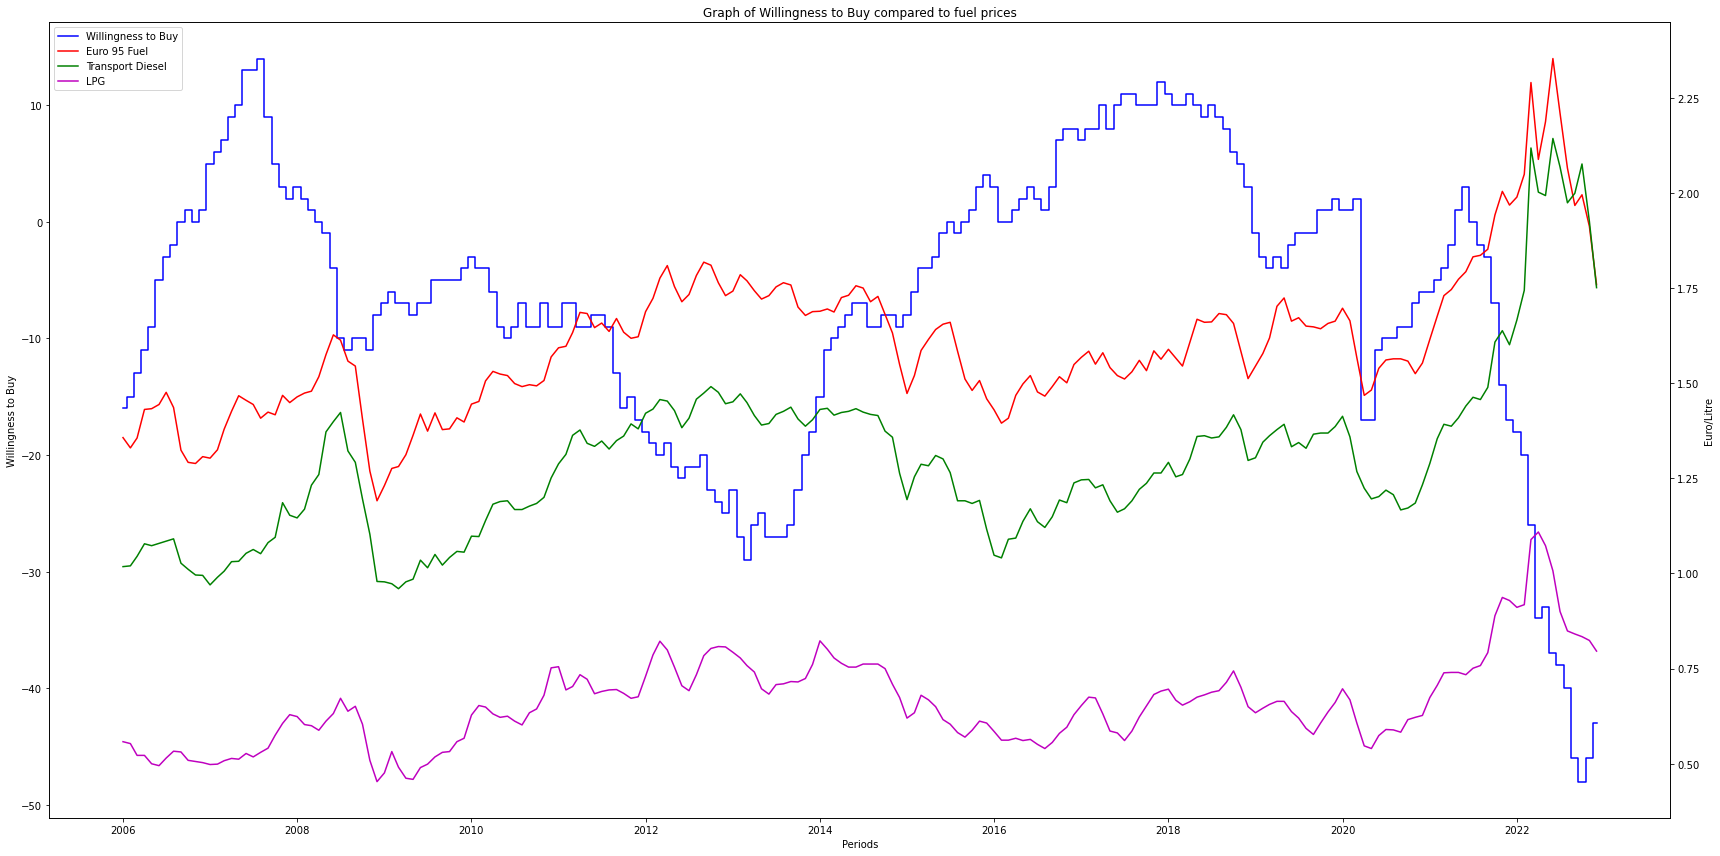

In [90]:
selected_columns = ['Periods', 'Willingness to buy', 'Euro 95', 'Transport diesel', 'LPG']
result = result[selected_columns]

# Create a figure 
fig, ax1 = plt.subplots(figsize=(24, 12))

# Sort the DataFrame by Periods
result = result.sort_values(by='Periods')

# Create a staircase graph for 'Willingness to Buy' on the left Y-axis
ax1.step(result['Periods'], result['Willingness to buy'], label='Willingness to Buy', where='mid', color='b')
ax1.set_xlabel('Periods')
ax1.set_ylabel('Willingness to Buy', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Graph of Willingness to Buy compared to fuel prices')

# Create a second set of axes on the right side
ax2 = ax1.twinx()

# Create a regular line plot for 'Verkoop' on the right Y-axis
ax2.plot(result['Periods'], result['Euro 95'], label='Euro 95 Fuel', color='r')
ax2.plot(result['Periods'], result['Transport diesel'], label='Transport Diesel', color='g')
ax2.plot(result['Periods'], result['LPG'], label='LPG', color='m')
ax2.set_ylabel('Euro/Litre')
ax2.tick_params(axis='y', labelcolor='black')

# Add a legend that includes both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
import plotly.graph_objects as go

# Select the columns of interest
selected_columns = ['Periods', 'Willingness to buy', 'Euro 95', 'Transport diesel', 'LPG']
result = result[selected_columns]

# Sort the DataFrame by Periods
result = result.sort_values(by='Periods')

# Create a figure using Plotly
fig = go.Figure()

# Add the first Y-axis for 'Willingness to Buy'
fig.add_trace(go.Scatter(x=result['Periods'], y=result['Willingness to buy'], mode='lines', name='Willingness to Buy', yaxis='y1'))

# Add the second Y-axis for 'Euro 95', 'Transport diesel', and 'LPG'
fig.add_trace(go.Scatter(x=result['Periods'], y=result['Euro 95'], mode='lines', name='Euro 95 Fuel', yaxis='y2'))
fig.add_trace(go.Scatter(x=result['Periods'], y=result['Transport diesel'], mode='lines', name='Transport Diesel', yaxis='y2'))
fig.add_trace(go.Scatter(x=result['Periods'], y=result['LPG'], mode='lines', name='LPG', yaxis='y2'))

# Set the layout with multiple Y-axes
fig.update_layout(
    xaxis=dict(title='Periods'),
    yaxis=dict(title='Willingness to Buy', side='left', showgrid=False, titlefont=dict(color='blue')),
    yaxis2=dict(title='Euro/Litre', overlaying='y', side='right', showgrid=False, titlefont=dict(color='black')),
    title='Graph of Willingness to Buy and Car Sales'
)

# Show the interactive plot
fig.show()
